In [ ]:
from google.colab import drive
drive.mount('/content/drive')              #here we mount the files present in our google drive to the google colab Files folder

Mounted at /content/drive


In [ ]:
import gdown                     #used for downloading files from google drive
import os
import zipfile

# Google Drive file ID
file_id = '1PmHJfONVJPNXVaQqV3XradlnjsF6u36w'

#"https://drive.google.com/file/d/1PmHJfONVJPNXVaQqV3XradlnjsF6u36w/view?usp=drive_link"
# Construct the download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Define the output file name (folder name)
output = 'DataSet1.zip'

# Download the file with gdown
gdown.download(url, output, quiet=False)

# Define the directory where you want to unzip the files
unzip_dir = '/content/unzipped_files'

# Create the directory if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f'Unzipped files are stored in: {unzip_dir}')


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1PmHJfONVJPNXVaQqV3XradlnjsF6u36w
From (redirected): https://drive.google.com/uc?export=download&id=1PmHJfONVJPNXVaQqV3XradlnjsF6u36w&confirm=t&uuid=d64c98f3-4212-4a19-9f09-2e6e3bfdf671
To: /content/DataSet1.zip
100%|██████████| 173M/173M [00:03<00:00, 46.7MB/s]


Unzipped files are stored in: /content/unzipped_files


In [ ]:
import glob                               # Provides functions to find all pathnames matching a specified pattern.
import numpy as np                            # A library for numerical operations, particularly useful for statistical calculations.
import cv2                                    #open CV library used for video processing
import os                                 # Provides a way to interact with the operating system, here used for path manipulations

# Define the base directory where the video files are located
base_dir = '/content/unzipped_files'

# Gather video files from multiple directories('**' used for recursive searching, *.mp4- looks for mp4 files)
video_files = glob.glob(os.path.join(base_dir, '**', '*.mp4'), recursive=True)

# Initialize an empty list for frame counts
frame_count = []

# Process each video file
for video_file in video_files:
    cap = cv2.VideoCapture(video_file)              #a VideoCapture object to read the video file

    # Check if video file was opened successfully
    if not cap.isOpened():
        print(f"Error opening video file {video_file}")
        continue

    # Get the number of frames in the video
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Only consider videos with at least 150 frames(the limit 150 helps in serving as a filter to exclude videos that might be too short to provide meaningful analysis
    if num_frames >= 150:
        frame_count.append(num_frames)

    # Release the video capture object
    cap.release()

# Check if there are valid frame counts
if frame_count:
    print("Frames:", frame_count)
    print("Total number of videos:", len(frame_count))
    print('Average frames per video:', np.mean(frame_count))
else:
    print("No valid videos found with at least 150 frames.")


Frames: [326, 332, 247, 435, 425, 458, 400, 298, 380, 409, 520, 306, 376, 201, 466, 340, 327, 510, 284, 350, 412, 308, 459, 445, 534, 400, 305, 309, 312, 308, 333, 383, 452, 274, 451, 303, 317, 363, 311, 315, 334, 337, 428, 410, 380, 489, 303, 529, 352, 269, 315, 272, 505, 316, 349, 390, 371, 325, 459, 224, 314, 322, 345, 361, 458, 365, 303, 272, 400, 272, 458, 272, 469, 469, 361, 445, 376, 365, 380, 400, 365, 400, 428, 303, 350, 376, 445, 469, 376, 272, 400, 303, 350, 400, 380, 372, 380, 361, 376, 469, 272, 469, 445, 428, 445, 350, 350, 365, 445, 383, 376, 303, 361, 361, 365, 428, 400, 350, 376, 361, 303, 272, 365, 303, 350, 469]
Total number of videos: 126
Average frames per video: 370.77777777777777


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=68e2ac92837f0337c3f4b6360580888135ccd555afc1cb71e1fd2812811ef108
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import glob
import cv2
import os
import face_recognition                            # Library for face detection and recognition tasks
from tqdm.autonotebook import tqdm                # A library for creating progress bars, useful for visualizing the progress of long-running tasks

# Function to extract frames from a video
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)          # Create a VideoCapture object to read the video file
    success = True
    while success:                                 # Looping until all frames have been read
        success, image = vidObj.read()          #reading frames
        if success:
            yield image

# Create output directories for face-only data (real and fake)
real_output_dir = '/content/drive/My Drive/FF_REAL_FACE_only'
fake_output_dir = '/content/drive/My Drive/FF_FAKE_FACE_only'

if not os.path.exists(real_output_dir):
    os.makedirs(real_output_dir)

if not os.path.exists(fake_output_dir):
    os.makedirs(fake_output_dir)

# Process the frames and extract faces
def create_face_videos(path_list, real_dir, fake_dir):
    real_videos_count = glob.glob(real_dir + '/*.mp4')
    fake_videos_count = glob.glob(fake_dir + '/*.mp4')

    print("No. of real videos already present:", len(real_videos_count))
    print("No. of fake videos already present:", len(fake_videos_count))

    # Iterate through each video in the path list
    for path in tqdm(path_list):
        # Determine if the video is real or fake based on the folder name
        if 'celeb-real' in path.lower():
            out_dir = real_dir
        elif 'celeb-synthesis' in path.lower():
            out_dir = fake_dir
        else:
            print(f"Skipping unknown video category for {path}")
            continue

        out_path = os.path.join(out_dir, os.path.basename(path))       # Defining the output path where the processed video will be saved
        file_exists = glob.glob(out_path)

        # Skip if the file already exists
        if len(file_exists) != 0:
            print("File already exists:", out_path)
            continue

        # Open the video file
        cap = cv2.VideoCapture(path)
        if not cap.isOpened():
            print(f"Error opening video file {path}")
            continue

        frames = []            #storing frames for processing
        out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (112, 112))       # Prepare the output video writer with codec (MJPG), frame rate (30), and frame size (112x112)

        for idx, frame in enumerate(frame_extract(path)):    #extract frames from video
            if idx <= 150:  # Only process the first 150 frames
                frames.append(frame)

                if len(frames) == 4:  # Process every 4 frames for face recognition(to improve efficiency and optimize memory usage)
                    faces = face_recognition.batch_face_locations(frames)
                    for i, face in enumerate(faces):     #iterating through detected faces & crop them
                        if len(face) != 0:
                            top, right, bottom, left = face[0]      #coordinates of face
                            try:
                                # Write the detected face to the video by resizing it to 112*112 pixels
                                face_frame = cv2.resize(frames[i][top:bottom, left:right], (112, 112))
                                out.write(face_frame)
                            except Exception as e:
                                print(f"Error processing frame {idx}:", e)
                    frames = []

        out.release()
        cap.release()

# Define the base directory and gather all .mp4 video files from all folders
base_dir = '/content/unzipped_files'
# Modified glob to find all .mp4 files recursively
video_files = glob.glob(os.path.join(base_dir, '**/*.mp4'), recursive=True)

# Check if videos were found
if not video_files:
    print("No videos found!")

# Process the video files and save output in the respective directories
create_face_videos(video_files, real_output_dir, fake_output_dir)


No. of real videos already present: 63
No. of fake videos already present: 63


<ipython-input-5-965c04ad4c85>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm                # A library for creating progress bars, useful for visualizing the progress of long-running tasks


  0%|          | 0/126 [00:00<?, ?it/s]

File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id0_0004.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id13_0010.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id17_0003.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id13_0009.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id2_0004.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id3_0000.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id1_0002.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id17_0009.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id2_0006.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id1_0004.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id0_0009.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id17_0004.mp4
File already exists: /content/drive/My Drive/FF_REAL_FACE_only/id2_0001.mp4
File al

In [ ]:
import glob
import torch              # PyTorch for deep learning tasks
import torchvision             # PyTorch's vision library for working with image datasets and models
from torchvision import transforms          # For applying transformations to images
from torch.utils.data import DataLoader           # DataLoader and Dataset classes for handling data
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import face_recognition

# Check if the video is corrupted or not
def validate_video(vid_path, train_transforms):

    """
    Takes the video path and transformation function as input,
    extracts frames, applies transformations, and checks the integrity of the video.
    """

    transform = train_transforms          #setting transformations to validate video
    count = 20              #no of frames to be extracted from video
    frames = []                   # List to store the frames after transformation
    a = int(100 / count)                # Step size for extracting frames
    first_frame = np.random.randint(0, a)               #Randomly selecting a starting frame
    temp_video = vid_path.split('/')[-1]

    for i, frame in enumerate(frame_extract(vid_path)):             #looping through each extracted frame
        frames.append(transform(frame))                       #applying transformation
        if len(frames) == count:
            break

    # Stack frames to check the validity
    frames = torch.stack(frames)
    frames = frames[:count]
    return frames

# Extract a frame from the video
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)             #opening video file
    success = True
    while success:
        success, image = vidObj.read()
        if success:
            yield image

# Image processing and normalization
#mean and standard deviation are used here to normalize the images (frames) as part of the preprocessing step
im_size = 112
mean = [0.485, 0.456, 0.406]              # Mean for normalization (standard ImageNet mean)
std = [0.229, 0.224, 0.225]                  # Standard deviation for normalization (standard ImageNet std)

#defining the transformations to be applied to the video
#tensors allow for fast and efficient matrix operations, which are essential for the computations
train_transforms = transforms.Compose([
    transforms.ToPILImage(),                    # Converting NumPy array (from OpenCV) to PIL image(PIL is a lib for image processing)
    transforms.Resize((im_size, im_size)),                 # Resizing the image to (112x112)
    transforms.ToTensor(),                       # Converting PIL image to PyTorch tensor(multi-dimensional arrays)
    transforms.Normalize(mean, std)                      # Normalizing the image with the given mean and std
])

# List of video directories to check for corrupted files
video_dirs = [

    '/content/drive/My Drive/FF_FAKE_FACE_only/*.mp4',
    '/content/drive/My Drive/FF_REAL_FACE_only/*.mp4'
]

# Gather all .mp4 video files from the directories
video_files = []
for video_dir in video_dirs:
    video_files += glob.glob(video_dir)

print("Total number of videos:", len(video_files))
print(video_files)

# Loop through each video and validate
count = 0              #counter to track each the number of processed videos
for video_path in video_files:
    try:
        count += 1
        validate_video(video_path, train_transforms)
    except Exception as e:
        print("Number of videos processed:", count, "Remaining:", (len(video_files) - count))
        print("Corrupted video is:", video_path)
        print("Error details:", str(e))
        # Remove corrupted video
        os.remove(video_path)
        print(f"Deleted corrupted video: {video_path}")
        continue

print("Number of corrupted videos deleted:", len(video_files) - count)


Total number of videos: 126
['/content/drive/My Drive/FF_FAKE_FACE_only/id2_id4_0002.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id0_id4_0002.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id0_id1_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id1_id3_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id0_id9_0002.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id1_id0_0000.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id4_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id9_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id1_0002.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id1_id2_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id3_id2_0000.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id3_0000.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id0_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id3_0001.mp4', '/content/drive/My Drive/FF_FAKE_FACE_only/id2_id3_0002.mp4', '/content/drive/My Drive/FF_FAKE_FACE_onl

In [ ]:
import json             # For handling JSON data (not used here)
import glob
import numpy as np
import cv2
import copy                  # For creating deep copies of objects(not used here)
import random
video_files =  glob.glob('/content/drive/My Drive/FF_FAKE_FACE_only/*.mp4')
video_files += glob.glob('/content/drive/My Drive/FF_REAL_FACE_only/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)           #two shuffles to ensure randomness

frame_count = []                #list for storing frame counts in each video
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)               #opening video file
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):            #if video has less than 100 frames, we remove it
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148]
Total no of video:  126
Average frame per video: 148.0


In [ ]:
import os
import glob
import csv

# Define the base directory where the video files are located
base_dir = '/content/unzipped_files/Dataset1'

# Define paths for real and fake video folders
real_videos_path = os.path.join(base_dir, 'Celeb-real')
fake_videos_path = os.path.join(base_dir, 'Celeb-synthesis')

# Find all .mp4 files in real and fake folders
real_videos = glob.glob(os.path.join(real_videos_path, '**/*.mp4'), recursive=True)
fake_videos = glob.glob(os.path.join(fake_videos_path, '**/*.mp4'), recursive=True)

# Define the output CSV file path
output_csv_path = '/content/video_labels.csv'

# Create and write to the CSV file
with open(output_csv_path, mode='w', newline='') as file:      #in write mode with no new newline
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Video Name', 'Label'])

    # Write real video entries
    for video in real_videos:
        video_name = os.path.basename(video)
        writer.writerow([video_name, 'REAL'])

    # Write fake video entries
    for video in fake_videos:
        video_name = os.path.basename(video)
        writer.writerow([video_name, 'FAKE'])

print(f"CSV file created at: {output_csv_path}")


CSV file created at: /content/video_labels.csv


Frames shape: torch.Size([60, 3, 224, 224])
Label: 0


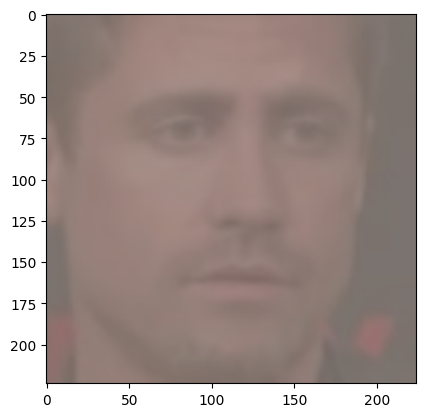

In [ ]:
import torch                    # PyTorch for deep learning tasks
import torchvision
from torchvision import transforms                 # Image transformation utilities
from torch.utils.data import DataLoader           # For creating batches of data
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas to handle CSV files
import face_recognition  # Optional import, though it's not used in the current code

# Define the video dataset class
class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names  # List of video file paths
        self.labels = labels  # DataFrame containing the video names and labels
        self.transform = transform  # Transform to apply to frames (e.g., resizing, normalization)
        self.count = sequence_length  # Number of frames to extract per video

    def __len__(self):
        return len(self.video_names)  # Return the number of videos

    def __getitem__(self, idx):
        video_path = self.video_names[idx]  # Get the video file path
        frames = []  # List to store the extracted frames
        a = int(100 / self.count)  # To control frame skipping
        first_frame = np.random.randint(0, a)
        temp_video = video_path.split('/')[-1]  # Get the video file name without the full path

        # Get the label for the current video based on the CSV data
        label = self.labels[self.labels["Video Name"] == temp_video]["Label"].values[0]
        label = 0 if label == 'FAKE' else 1  # Convert 'FAKE' to 0 and 'REAL' to 1

        # Extract and transform frames
        for i, frame in enumerate(self.frame_extract(video_path)):
            frames.append(self.transform(frame))  # Apply transformations (resize, tensor, etc.)
            if len(frames) == self.count:
                break

        frames = torch.stack(frames)  # Convert the list of frames to a tensor
        frames = frames[:self.count]  # Ensure we only take the desired number of frames
        return frames, label  # Return the frames and the corresponding label

    def frame_extract(self, path):                       #function to extract frames from the video
        vidObj = cv2.VideoCapture(path)  # Open the video file
        success = True
        while success:
            success, image = vidObj.read()  # Read a frame
            if success:
                yield image  # Yield the frame

# Function to plot a tensor image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)  # Convert tensor to numpy array and rearrange the dimensions for plotting
    b, g, r = cv2.split(image)  # Split channels (OpenCV uses BGR format)
    image = cv2.merge((r, g, b))  # Convert BGR to RGB
    # Undo normalization (assuming specific mean and std values)
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0  # Scale back to the range of pixel values
    plt.imshow(image.astype(int))  # Plot the image
    plt.show()

# Load the CSV file
csv_file_path = '/content/video_labels.csv'
labels = pd.read_csv(csv_file_path)

# Get the list of video file paths from two folders
video_folder_1 = '/content/drive/MyDrive/FF_REAL_FACE_only'  # First folder containing videos
video_folder_2 = '/content/drive/MyDrive/FF_FAKE_FACE_only'  # Second folder containing videos

# Read videos from both folders and combine them into one list
video_names_1 = [os.path.join(video_folder_1, f) for f in os.listdir(video_folder_1) if f.endswith('.mp4')]  # Adjust for your video format
video_names_2 = [os.path.join(video_folder_2, f) for f in os.listdir(video_folder_2) if f.endswith('.mp4')]

# Merge the lists from both folders
video_names = video_names_1 + video_names_2

# Define transformation pipeline for frames
transform = transforms.Compose([
    transforms.ToPILImage(),          # Convert frame to PIL image
    transforms.Resize((224, 224)),    # Resize the frame
    transforms.ToTensor()             # Convert image to tensor
])

# Initialize the dataset
sequence_length = 60  # Set the number of frames to extract from each video
dataset = video_dataset(video_names=video_names, labels=labels, sequence_length=sequence_length, transform=transform)

# Example usage:
# Get a sample from the dataset (for instance, the first video)
frames, label = dataset[82]  # Fetch the first video frames and label
print("Frames shape:", frames.shape)  # Should print something like (60, 3, 224, 224) if 60 frames are extracted
print("Label:", label)  # Will print 0 (FAKE) or 1 (REAL)

# Plot a single frame from the sequence
im_plot(frames[0])  # Plot the first frame from the extracted frames


In [ ]:
import pandas as pd

def number_of_real_and_fake_videos(data_list):
    # Load the CSV with the correct header
    header_list = ["Video Name", "Label"]
    lab = pd.read_csv('/content/video_labels.csv', names=header_list)

    fake = 0
    real = 0

    # Loop through the video list
    for i in data_list:
        temp_video = i.split('/')[-1]  # Get the video filename
        # Find the label for the current video based on the Video Name
        label = lab.iloc[(lab.loc[lab["Video Name"] == temp_video].index.values[0]), 1]  # Get the label

        # Count based on the label
        if label == 'FAKE':
            fake += 1
        if label == 'REAL':
            real += 1

    # Print after counting all videos
    print("Number of fake videos: ", fake)
    print("Number of real videos: ", real)

    return real, fake


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train :  88
test :  38
Number of fake videos:  44
Number of real videos:  44
Number of fake videos:  44
Number of real videos:  44
TRAIN:  Real: 44  Fake: 44
Number of fake videos:  19
Number of real videos:  19
Number of fake videos:  19
Number of real videos:  19
TEST:  Real: 19  Fake: 19


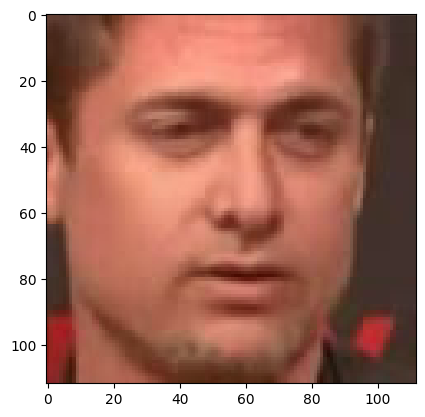

In [ ]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split              # Import train_test_split for data splitting

# Load the CSV with the correct column names
labels = pd.read_csv('/content/video_labels.csv')  # CSV already has the headers

# Split video files into training and validation sets (80% for training, 20% for validation)
train_videos = video_files[:int(0.7 * len(video_files))]
valid_videos = video_files[int(0.7 * len(video_files)):]

print("train : ", len(train_videos))
print("test : ", len(valid_videos))

# Print the number of real and fake videos in the training and validation sets
print("TRAIN: ", "Real:", number_of_real_and_fake_videos(train_videos)[0], " Fake:", number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:", number_of_real_and_fake_videos(valid_videos)[0], " Fake:", number_of_real_and_fake_videos(valid_videos)[1])

# Define image size and normalization parameters
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define transformations for training and validation data
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Update video_dataset to work with the correct labels
train_data = video_dataset(train_videos, labels, sequence_length=10, transform=train_transforms)
val_data = video_dataset(valid_videos, labels, sequence_length=10, transform=test_transforms)

# Create DataLoader for training and validation
train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

# Example: Access an image and label from the dataset
image, label = train_data[0]
im_plot(image[0, :, :, :])  # Plot the first frame of the sequence


In [ ]:
 # Instantiate the model with 2 output classes (for binary classification) and moved the model to the GPU for faster processing using CUDA.
model = Model(2).cuda()

# Create an uninitialized tensor (1 video, 20 frames, 3 channels, 112x112),convert to CUDA FloatTensor, and pass to the model, which returns two outputs.
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 63.8MB/s]


Training


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[Epoch 1/25] [Batch 21 / 22] [Loss: 0.313379, Acc: 93.18%]Testing
[Batch 10 / 10]  [Loss: 0.507182, Acc: 86.84%]
Accuracy 86.84210526315789
Training
[Epoch 2/25] [Batch 21 / 22] [Loss: 0.147783, Acc: 97.73%]Testing
[Batch 10 / 10]  [Loss: 0.345757, Acc: 89.47%]
Accuracy 89.47368421052632
Training
[Epoch 3/25] [Batch 21 / 22] [Loss: 0.221590, Acc: 96.59%]Testing
[Batch 10 / 10]  [Loss: 0.395143, Acc: 86.84%]
Accuracy 86.84210526315789
Training
[Epoch 4/25] [Batch 21 / 22] [Loss: 0.263422, Acc: 92.05%]Testing
[Batch 10 / 10]  [Loss: 0.356663, Acc: 86.84%]
Accuracy 86.84210526315789
Training
[Epoch 5/25] [Batch 21 / 22] [Loss: 0.207295, Acc: 95.45%]Testing
[Batch 10 / 10]  [Loss: 0.441277, Acc: 86.84%]
Accuracy 86.84210526315789
Training
[Epoch 6/25] [Batch 21 / 22] [Loss: 0.210086, Acc: 97.73%]Testing
[Batch 10 / 10]  [Loss: 0.379367, Acc: 89.47%]
Accuracy 89.47368421052632
Training
[Epoch 7/25] [Batch 21 / 22] [Loss: 0.326197, Acc: 92.05%]Testing
[Batch 10 / 10]  [Loss: 0.357252, Acc: 8

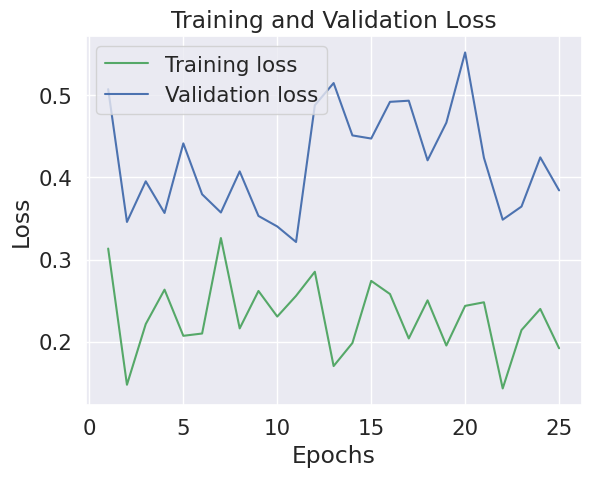

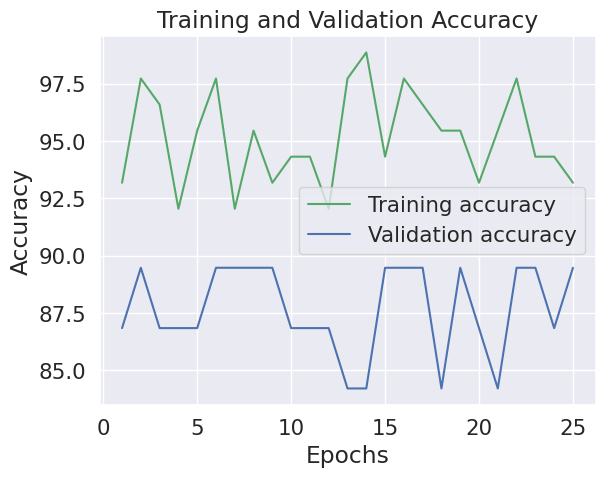

[[19  0]
 [ 4 15]]


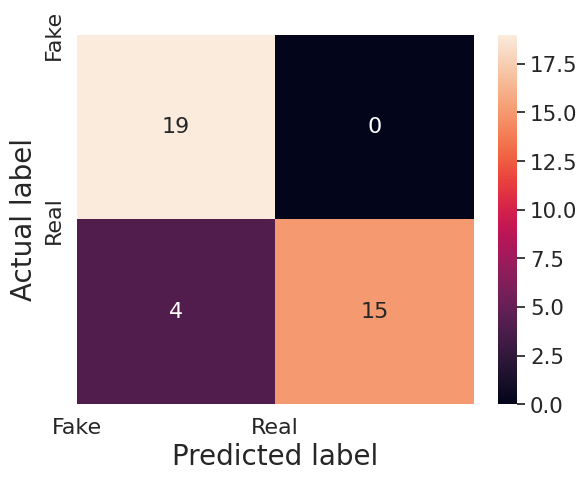

Calculated Accuracy 89.47368421052632


In [ ]:
import numpy as np
import torch                             #PyTorch library for tensor operations and deep learning.
import torch.nn as nn                    #Imports the neural network module from PyTorch, providing essential layers and loss functions.
from torchvision import models
from torch.autograd import Variable
import time
import os
import sys
import seaborn as sn                    #for advanced data visualization and plotting.
import matplotlib.pyplot as plt         #for creating static, animated, and interactive visualizations.
import pandas as pd
from sklearn.metrics import confusion_matrix

# Model Definition
class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=True):     #latent_dim= dimension of input feature to LSTM
        super(Model, self).__init__()                                                                         #Calls the constructor of the parent class (nn.Module) to ensure proper initialization of the neural network.
        model = models.resnext50_32x4d(pretrained=True)                                                       #Loads a pre-trained ResNeXt-50 model
        self.model = nn.Sequential(*list(model.children())[:-2])                                              #Extracts all layers except the last two (typically the classification head) to use as a feature extractor.
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.relu = nn.LeakyReLU()                                                                            #Initializes a Leaky ReLU activation function
        self.dp = nn.Dropout(0.4)                                                                             #Adds a dropout layer with a rate of 0.4 to help prevent overfitting by randomly zeroing out 40% of the neurons during training.
        self.linear1 = nn.Linear(2048, num_classes)                                                           #Defines a fully connected layer that maps the LSTM output to the number of classes (2 classes: fake and real).
        self.avgpool = nn.AdaptiveAvgPool2d(1)                                                                #Initializes an adaptive average pooling layer that reduces the spatial dimensions of the feature maps to 1x1, retaining global information.

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape                                                             #c=no. of channels (3-RGB) (h*w=112*112)
        x = x.view(batch_size * seq_length, c, h, w)                                                          #Reshapes the input tensor x to (batch_size * seq_length, channels, height, width), allowing each frame to be processed individually by the CNN.
        fmap = self.model(x)                                                                                  #Passes the reshaped input through the ResNeXt model to extract feature maps.
        x = self.avgpool(fmap)                                                                                #Applies adaptive average pooling to reduce spatial dimensions to 1x1.
        x = x.view(batch_size, seq_length, 2048)                                                              #Reshapes the pooled output to (batch_size, seq_length, 2048), making it suitable for input to the LSTM.
        x_lstm, _ = self.lstm(x, None)                                                                        #Passes the input tensor through the LSTM layer, initializing the hidden state to zeros; 'x_lstm' contains the LSTM output for each time step and output of hidden state is ignored(_).
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))                                         #outputs:1) Feature maps from the CNN. 2) The final classification scores after dropout of linear layer applied after averaging LSTM outputs.

# Training and Testing Functions
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    print('Training')
    model.train()                                                                                            #Enables training-specific behaviors like dropout and batch normalization.

    #avg loss and accuracy
    losses = AverageMeter()
    accuracies = AverageMeter()

    for i, (inputs, labels) in enumerate(data_loader):
        if torch.cuda.is_available():
            labels = labels.type(torch.cuda.LongTensor).cuda()
            inputs = inputs.cuda()

        _, outputs = model(inputs)                                                                          #Passes inputs through the model to get outputs.
        loss = criterion(outputs, labels)                                                                   #loss between the model outputs and true labels using the specified loss criterion.
        acc = calculate_accuracy(outputs, labels)                                                           #accuracy for the batch.

        #Updates the losses and accuracies meters with the current batch's loss and accuracy.
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))

        # Zero the optimizer's gradients, compute gradients through backpropagation using the loss, and update model parameters based on the computed gradients.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
            % (epoch, num_epochs, i, len(data_loader), losses.avg, accuracies.avg))

    #Saves the model's state after the epoch.
    torch.save(model.state_dict(), 'checkpoint.pt')

    return losses.avg, accuracies.avg                                                                       #Returns the average loss and accuracy for the epoch.


def test(epoch, model, data_loader, criterion):
    print('Testing')

    #Put the model in evaluation mode, disabling dropout and batch normalization.
    model.eval()


    #avg loss and accuracy
    losses = AverageMeter()
    accuracies = AverageMeter()

    #empty lists to store predictions (pred) and true labels (true).
    pred = []
    true = []

    with torch.no_grad():                                                                                   #Disables gradient computation for efficiency.
        for i, (inputs, labels) in enumerate(data_loader):
            if torch.cuda.is_available():
                labels = labels.cuda().type(torch.cuda.LongTensor)
                inputs = inputs.cuda()

            #Passes the inputs through the model to get predictions.
            _, outputs = model(inputs)

            loss = criterion(outputs, labels)
            acc = calculate_accuracy(outputs, labels)

            #Gets the predicted class labels by finding the index of the maximum score in the outputs.
            _, p = torch.max(outputs, 1)

            #Appends the true and predicted labels to their respective lists, converting them to NumPy arrays first.
            true += labels.cpu().numpy().reshape(len(labels)).tolist()
            pred += p.cpu().numpy().reshape(len(p)).tolist()

            #Updates the loss and accuracy meters with the current batch's loss and accuracy.
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))

            sys.stdout.write(
                "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                % (i+1, len(data_loader), losses.avg, accuracies.avg)
            )

        #Print the average accuracy for the test set after all batches have been processed.
        print('\nAccuracy {}'.format(accuracies.avg))

    return true, pred, losses.avg, accuracies.avg                                                        #Returns the true labels, predicted labels, average loss, and average accuracy.

class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, labels):
    batch_size = labels.size(0)                         #Number of samples in the batch.
    _, pred = outputs.topk(1, 1, True)                  #Retrieves the indices of the top-1 predictions for each sample.
    pred = pred.t()                                     #Transposes the prediction tensor for comparison.
    correct = pred.eq(labels.view(1, -1))               #Checks if predictions match true labels.
    n_correct_elems = correct.float().sum().item()      #Counts the number of correct predictions.
    return 100 * n_correct_elems / batch_size

# Plotting Functions
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.ylabel('Actual label', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size=16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size=16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    print("Calculated Accuracy", calculated_acc * 100)

def plot_loss(train_loss_avg, test_loss_avg, num_epochs):
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, train_loss_avg, 'g', label='Training loss')
    plt.plot(epochs, test_loss_avg, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(train_accuracy, test_accuracy, num_epochs):
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
    plt.plot(epochs, test_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Hyperparameters and Initialization
lr = 1e-5  # Learning rate
num_epochs = 25  # Number of epochs
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5) #Initializes the Adam optimizer with the model parameters, specified learning rate, and weight decay for regularization.

# If class imbalance exists
class_weights = torch.tensor([1.0, 1.0]).cuda()  # Defines class weights to handle class imbalance
criterion = nn.CrossEntropyLoss(weight=class_weights).cuda()  # Uses cross-entropy loss with class weights

# Lists to store average loss and accuracy
train_loss_avg = []
train_accuracy = []
test_loss_avg = []
test_accuracy = []

# Training and Validation Loop
for epoch in range(1, num_epochs + 1):
    l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)

    true, pred, tl, t_acc = test(epoch, model, valid_loader, criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)

# Plotting Loss and Accuracy
plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

# Confusion Matrix
print(confusion_matrix(true, pred))
print_confusion_matrix(true, pred)


In [ ]:
import torch
import os

# Define the model (make sure the model class definition is included above)
model = Model(2).cuda()

# Path to the saved model
path_to_model = '/content/checkpoint.pt'

# Check if the model file exists
if os.path.exists(path_to_model):
    model.load_state_dict(torch.load(path_to_model))
    model.eval()
    print("Model loaded successfully from:", path_to_model)
else:
    print(f"Model file not found at {path_to_model}. Please check the path and try again.")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-22-0926f3362682>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models 

Model loaded successfully from: /content/checkpoint.pt


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch.nn as nn

# Normalization parameters
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
sm = nn.Softmax(dim=1)

# Inverse normalization for image display
inv_normalize = transforms.Normalize(mean=[-m/s for m, s in zip(mean, std)],
                                      std=[1/s for s in std])

def im_convert(tensor):
    """Display a tensor as an image."""
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1, 2, 0)
    image = image.clip(0, 1)
    return (image * 255).astype(np.uint8)

def predict(model, img, path='./'):
    """Make predictions and visualize the results."""
    model.eval()  # Set the model to evaluation mode
    fmap, logits = model(img.to('cuda'))  # Get feature maps and logits
    weight_softmax = model.linear1.weight.detach().cpu().numpy()  # Get weights for the softmax
    logits = sm(logits)  # Apply softmax to logits
    _, prediction = torch.max(logits, 1)  # Get the predicted class
    confidence = logits[:, int(prediction.item())].item() * 100  # Confidence percentage

    print('Confidence of prediction:', confidence)

    idx = np.argmax(logits.detach().cpu().numpy())  # Get index of the class with the highest probability
    bz, nc, h, w = fmap.shape  # Get dimensions of the feature map

    # Compute the weighted sum of the feature map
    out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h * w)).T, weight_softmax[idx, :].T)
    predict_map = out.reshape(h, w)  # Reshape to original dimensions
    predict_map = predict_map - np.min(predict_map)  # Normalize to [0, 1]
    predict_img = predict_map / np.max(predict_map)
    predict_img = np.uint8(255 * predict_img)  # Scale to [0, 255]
    out_resized = cv2.resize(predict_img, (im_size, im_size))  # Resize heatmap

    # Generate heatmap
    heatmap = cv2.applyColorMap(out_resized, cv2.COLORMAP_JET)

    # Convert the input image tensor to a visual format
    img_display = im_convert(img[:, -1, :, :, :])  # Use the last frame for visualization

    # Combine heatmap and original image
    result = heatmap * 0.5 + img_display * 0.8
    result_final = cv2.merge(cv2.split(result))  # Ensure the color channels are merged

    # Save the resulting image
    cv2.imwrite(path + 'result.png', result_final)
    plt.imshow(result_final.astype(np.uint8))
    plt.axis('off')  # Hide axes
    plt.show()  # Display the result

    return [int(prediction.item()), confidence]  # Return prediction and confidence


In [ ]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

<ipython-input-30-2d1c9ae2243a>:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path_to_model))


Processing video: /content/drive/MyDrive/testing/id1_id4_0006.mp4
Confidence of prediction: 99.44702386856079


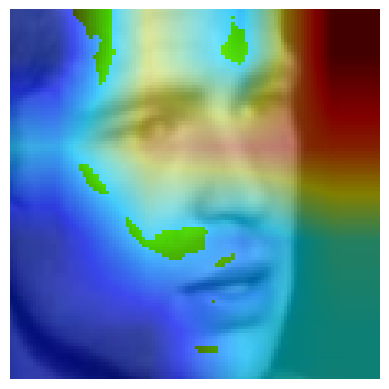

Prediction: FAKE
Processing video: /content/drive/MyDrive/testing/id1_id4_0007.mp4
Confidence of prediction: 70.93400359153748


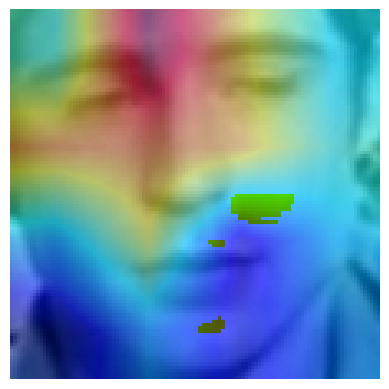

Prediction: FAKE
Processing video: /content/drive/MyDrive/testing/00000.mp4
Confidence of prediction: 98.4744131565094


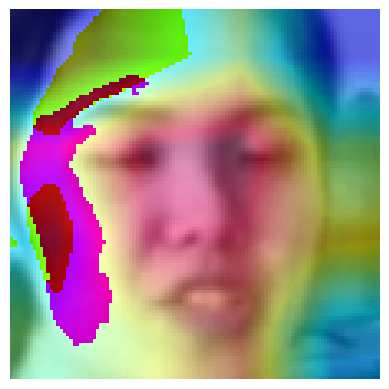

Prediction: REAL
Processing video: /content/drive/MyDrive/testing/id0_id3_0002.mp4
Confidence of prediction: 96.96238040924072


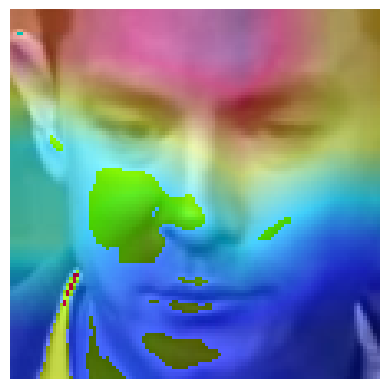

Prediction: FAKE


In [ ]:
import torch
from torchvision import transforms
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define image size and normalization parameters
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define transformations
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Define the paths to the videos
path_to_videos = [
  '/content/drive/MyDrive/testing/id1_id4_0006.mp4',
  '/content/drive/MyDrive/testing/id1_id4_0007.mp4',
  '/content/drive/MyDrive/testing/00000.mp4',
  '/content/drive/MyDrive/testing/id0_id3_0002.mp4'
]

# Create the dataset for validation
video_dataset = validation_dataset(path_to_videos, sequence_length=20, transform=train_transforms)

# Load the model
model = Model(num_classes=2).cuda()
path_to_model = '/content/checkpoint.pt'  # Updated to your model path
if os.path.exists(path_to_model):
    model.load_state_dict(torch.load(path_to_model))
    model.eval()
else:
    print(f"Model file not found at {path_to_model}. Please check the path and try again.")

# Making predictions
for video_path in path_to_videos:
    print(f"Processing video: {video_path}")

    # Find the index of the current video to get frames
    video_index = path_to_videos.index(video_path)
    frames_tensor = video_dataset[video_index]  # Accessing the frames for the specific video

    prediction = predict(model, frames_tensor)  # Pass the correct frames_tensor
    if prediction[0] == 1:
        print("Prediction: REAL")
    else:
        print("Prediction: FAKE")
